In [1]:
## Mounnting the drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install -q --upgrade fastcore fastai
!pip install -q efficientnet_pytorch

  Preparing metadata (setup.py) ... done


In [3]:
## importing the libraries 
import fastai
from fastai.vision.all import *
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import gc
import warnings 
from efficientnet_pytorch import EfficientNet 
warnings.filterwarnings('ignore')

In [4]:
## Resizing the images so as to speed up the running process 
import os
from multiprocessing import Pool, cpu_count
from PIL import Image
import shutil

try:
  
    os.mkdir("ModImages")
except:
    pass

def reduce_size(img_path):
    basewidth = 720
    ## opens where the images are stored 
    img = Image.open("/content/drive/MyDrive/jenga_school/Images/"+img_path)
    wpercent = (basewidth / float(img.size[0]))
    hsize = int((float(img.size[1])*float(wpercent)))
    img = img.resize((basewidth, hsize), Image.ANTIALIAS)
    img.save("ModImages/"+img_path)


with Pool(cpu_count()) as p:
    p.map(reduce_size, os.listdir("/content/drive/MyDrive/jenga_school/Images"))

# store the modified Images where the original folder is in drive 

!zip -r ModImages.zip /content/ModImages -q
!cp ModImages.zip /content/drive/MyDrive/jenga_school

In [5]:
!cp  "/content/drive/MyDrive/jenga_school/ModImages.zip" -r "/content" ## Changing the directory of the modified images 

In [6]:
!unzip '/content/drive/MyDrive/jenga_school/ModImages.zip' ## unzipping the modified images 

Streaming output truncated to the last 5000 lines.
  inflating: content/ModImages/ImageID_OC3D1JKA.jpg  
  inflating: content/ModImages/ImageID_N59SVOBX.jpg  
  inflating: content/ModImages/ImageID_ENNWSVCN.jpg  
  inflating: content/ModImages/ImageID_JT2KRHPX.jpg  
  inflating: content/ModImages/ImageID_6EVDQPCU.jpg  
  inflating: content/ModImages/ImageID_P5H0CXL9.jpg  
  inflating: content/ModImages/ImageID_L61PMN4S.jpg  
  inflating: content/ModImages/ImageID_5LHUR6IB.jpg  
  inflating: content/ModImages/ImageID_ESNB6PB2.jpg  
  inflating: content/ModImages/ImageID_2ZMH4U8U.jpg  
  inflating: content/ModImages/ImageID_5KUTEMD2.jpg  
  inflating: content/ModImages/ImageID_LG3LSYOI.jpg  
  inflating: content/ModImages/ImageID_8UINGAU1.jpg  
  inflating: content/ModImages/ImageID_1WYWO0O9.jpg  
  inflating: content/ModImages/ImageID_ESOT191V.jpg  
  inflating: content/ModImages/ImageID_2ETYTVP6.jpg  
  inflating: content/ModImages/ImageID_XOQWWS1N.jpg  
  inflating: content/ModImages/

In [7]:
fastai.__version__ ## checks the version of the fastai 

'2.7.11'

In [8]:
path = Path('/content/drive/MyDrive/jenga_school') ## sets the path where the images are located 

In [9]:
path.ls() 

(#7) [Path('/content/drive/MyDrive/jenga_school/SampleSubmission (2).csv'),Path('/content/drive/MyDrive/jenga_school/Train.csv'),Path('/content/drive/MyDrive/jenga_school/Test.csv'),Path('/content/drive/MyDrive/jenga_school/Images'),Path('/content/drive/MyDrive/jenga_school/.ipynb_checkpoints'),Path('/content/drive/MyDrive/jenga_school/ModImages.zip'),Path('/content/drive/MyDrive/jenga_school/StarterNotebook_Task_Mate_Kenyan_Sign_Language.ipynb')]

In [10]:
fnames = get_image_files(path/"Images") ## checks the length of the images 
len(fnames)

8928

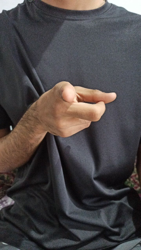

In [12]:
dest = fnames[500] ## printing the 500th image
im = Image.open(dest)
im.to_thumb(250,250)

In [13]:
#train_path = Path('/content/drive/MyDrive/jenga_school/Train.csv')
## Loading the train and test set and sample submission file 
train_df = pd.read_csv('/content/drive/MyDrive/jenga_school/Train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/jenga_school/Test.csv')
ss = pd.read_csv('/content/drive/MyDrive/jenga_school/SampleSubmission (2).csv')
print(train_df.shape)
train_df.head()

(6249, 2)


,img_IDS,Label
0,ImageID_33HMDMJ3,Temple
1,ImageID_V5POEX4O,Church
2,ImageID_89CCCCW6,Enough/Satisfied
3,ImageID_GNJXOWX5,Me
4,ImageID_7Q9LOP7R,Love


In [14]:
## setting the seed 
def random_seed(seed_value, use_cuda): 
    np.random.seed(seed_value)
 #cpu vars
    torch.manual_seed(seed_value) 
# cpu  vars
    random.seed(seed_value)
 # Python 
    if use_cuda: 
        torch.cuda.manual_seed(seed_value) 
        torch.cuda.manual_seed_all(seed_value) 
# gpu vars
        torch.backends.cudnn.deterministic = True 
 #needed
        torch.backends.cudnn.benchmark = False 
#Remember to use num_workers=0 when creating the DataBunch
random_seed(2023234, True)

In [15]:
print(test_df.shape)
test_df.head()

(2679, 1)


,img_IDS
0,ImageID_USRB8QNG
1,ImageID_SZ8D1ZJI
2,ImageID_4OJO2F8J
3,ImageID_IEE4XV0B
4,ImageID_BP0O0WZ9


Text(0.5, 1.0, 'Value labels count')

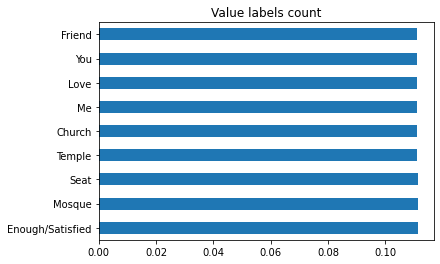

In [16]:
# Plotting the value count of every category 
train_df['Label'].value_counts(normalize = True).plot(kind = "barh")
plt.title("Value labels count")

In [17]:
train_df.img_IDS    = ["/content/content/ModImages/"+i+".jpg" for i in train_df.img_IDS] ## this is adding the path image infront of the image ID 
train_df.head()

,img_IDS,Label
0,/content/content/ModImages/ImageID_33HMDMJ3.jpg,Temple
1,/content/content/ModImages/ImageID_V5POEX4O.jpg,Church
2,/content/content/ModImages/ImageID_89CCCCW6.jpg,Enough/Satisfied
3,/content/content/ModImages/ImageID_GNJXOWX5.jpg,Me
4,/content/content/ModImages/ImageID_7Q9LOP7R.jpg,Love


In [ ]:
#def get_y(r): return r['Label']

In [ ]:
## creating a datablock
#dls0 = DataBlock(blocks=(ImageBlock, CategoryBlock),
  #              get_items = get_image_files,
 #               splitter = RandomSplitter(valid_pct=0.2, seed=42),
   #             get_y = ColReader(1),
    #            item_tfms=[Resize(300, method='squish')],
     #          batch_tfms = aug_transforms(mult=2)
      #         )
#dls = dls0.dataloaders(path, bs = 32)

In [18]:
path

Path('/content/drive/MyDrive/jenga_school')

In [ ]:
#dls.show_batch(max_n = 4)

In [19]:
## Issues with the data that must be dropped 
issues = [
("/content/content/ModImages/ImageID_2OK3T60A.jpg", "Church"),
("/content/content/ModImages/ImageID_TSDTGVSP.jpg","Church"),
("/content/content/ModImages/ImageID_Z9R5974U.jpg", "Mosque"),
("/content/content/ModImages/ImageID_NX8DEEOB.jpg", "Church"),
("/content/content/ModImages/ImageID_8DG4BZVU.jpg", "Enough/Satisfied"),
("/content/content/ModImages/ImageID_44IZ9AMM.jpg","Mosque"),
("/content/content/ModImages/ImageID_N8F9Y28D.jpg", "Love"),
("/content/content/ModImages/ImageID_EX8EVQ7A.jpg", ""),
("/content/content/ModImages/ImageID_VCY3SUBA.jpg", "Enough/Satisfied"),
("/content/content/ModImages/ImageID_HB7CEIP5.jpg","Church"),
("/content/content/ModImages/ImageID_0C7FSZ03.jpg","You"),
("/content/content/ModImages/ImageID_DRZPQNVU.jpg", "Me"),
("/content/content/ModImages/ImageID_W5YJTE0R.jpg", "Church"),
("/content/content/ModImages/ImageID_YE1WRYCD.jpg","Mosque"),
("/content/content/ModImages/ImageID_NX8DEEOB.jpg","Mosque"),
("/content/content/ModImages/ImageID_SP8Y5BEN.jpg","Church"),
("/content/content/ModImages/ImageID_DKH9T5LV.jpg",""),
("/content/content/ModImages/ImageID_NL71ON8Y.jpg",""),
("/content/content/ModImages/ImageID_BXWESWG5.jpg","Mosque"),
("/content/content/ModImages/ImageID_WK885JRM.jpg",""),
("/content/content/ModImages/ImageID_E1RRXW2N.jpg","Church"),
("/content/content/ModImages/ImageID_VJPPH215.jpg","Enough/Satisfied"),
("/content/content/ModImages/ImageID_SPLFHVZM.jpg", "Church"),
("/content/content/ModImages/ImageID_7XFH50C2.jpg", "Temple"),
("/content/content/ModImages/ImageID_20EMNL7G.jpg", "You"),
("/content/content/ModImages/ImageID_2CIWXSFB.jpg", "You")
]

In [20]:
for x,y in issues:
  train_df.loc[train_df['img_IDS'] == x, 'Label'] = y

In [21]:
train_df.loc[train_df['Label'] == ""].index.values.tolist()

[2622, 2651, 3480, 3514]

In [22]:
train_df = train_df.drop(train_df.loc[train_df['Label'] == ""].index.values.tolist(), axis = 0).reset_index(drop=True)

In [24]:
# finding the value count for each label
train_df.Label.value_counts()

Mosque              698
You                 697
Me                  694
Friend              694
Seat                694
Church              693
Enough/Satisfied    693
Love                692
Temple              690
Name: Label, dtype: int64

In [25]:
## creating a datablock that will be passed to the model 
data = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    splitter=TrainTestSplitter(0.05, stratify=train_df["Label"]),
  get_x = ColReader(0),
  item_tfms=Resize((320,320), method='squish'), #Extra tip, use size that's suitable for the efficentNetwork you are using.
    get_y=ColReader(1),
    batch_tfms = [*aug_transforms(do_flip=True,flip_vert=False,max_lighting=0.4,max_zoom=1.2,max_warp=0.2,max_rotate=30,xtra_tfms=None),Normalize.from_stats(*imagenet_stats)]
    )

In [26]:
dls = data.dataloaders(train_df, bs = 64, num_workers = 0)

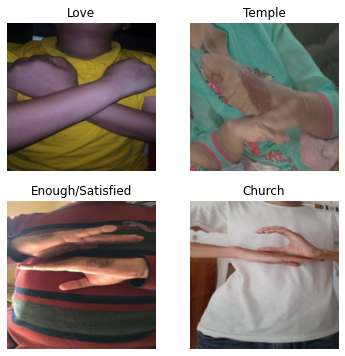

In [27]:
dls.show_batch(max_n = 8, nrows = 2, ncols = 2) ## showing afew samples 

In [ ]:
## fine tuning with resnet50
learn = vision_learner(dls, resnet50, metrics=[error_rate, accuracy]) 
learn.fine_tune(2)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.921653,1.074261,0.325879,0.674121,04:16


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.699342,0.270485,0.070288,0.929712,04:54


SuggestedLRs(valley=0.00010964782268274575)

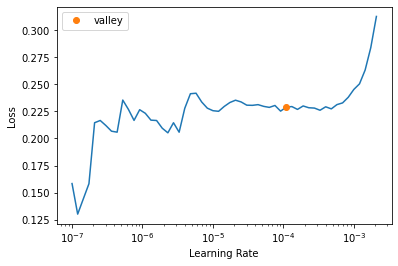

In [ ]:
learn.lr_find()

In [ ]:
test_df.img_IDS = ["/content/content/ModImages/"+i+".jpg" for i in test_df.img_IDS] ## adding the the directory infront of the test as well 

In [ ]:
test_df.head()

,img_IDS
0,/content/content/ModImages/ImageID_USRB8QNG.jpg
1,/content/content/ModImages/ImageID_SZ8D1ZJI.jpg
2,/content/content/ModImages/ImageID_4OJO2F8J.jpg
3,/content/content/ModImages/ImageID_IEE4XV0B.jpg
4,/content/content/ModImages/ImageID_BP0O0WZ9.jpg


In [ ]:
tdl = learn.dls.test_dl(test_df["img_IDS"]) # quicly create test data loader
test_preds_tta, test_labels_tta = learn.tta(dl=tdl, n=15) # Test time Augmentation 

In [ ]:
preds_test = test_preds_tta
preds_test[:5]

TensorBase([[8.2438e-02, 9.2701e-05, 1.5845e-02, 3.2219e-03, 3.7451e-03,
             1.2740e-01, 5.7483e-03, 7.5893e-01, 2.5820e-03],
            [2.8594e-02, 9.6841e-01, 3.6058e-04, 1.0445e-05, 1.9099e-03,
             1.1488e-04, 7.1026e-05, 3.7997e-04, 1.4606e-04],
            [1.5068e-03, 3.1006e-04, 1.1790e-05, 1.0970e-05, 2.4683e-05,
             9.9808e-01, 3.5688e-05, 1.4578e-05, 2.6280e-06],
            [1.9754e-04, 1.7902e-05, 1.3692e-06, 2.0999e-06, 9.3365e-06,
             9.9839e-01, 4.1913e-04, 8.6327e-04, 1.0334e-04],
            [1.8391e-04, 5.1784e-05, 5.0420e-06, 3.9665e-06, 9.9465e-05,
             2.7587e-05, 1.6288e-03, 1.3595e-03, 9.9664e-01]])

In [ ]:
submission = ss.copy() ## make a copy of submission file 
k=[]
for col in submission.columns: 
  k.append(col) # creating list of the label

In [ ]:
submission.head()

,img_IDS,Church,Enough/Satisfied,Friend,Love,Me,Mosque,Seat,Temple,You
0,ImageID_USRB8QNG,0,0,0,0,0,0,0,0,0
1,ImageID_SZ8D1ZJI,0,0,0,0,0,0,0,0,0
2,ImageID_4OJO2F8J,0,0,0,0,0,0,0,0,0
3,ImageID_IEE4XV0B,0,0,0,0,0,0,0,0,0
4,ImageID_BP0O0WZ9,0,0,0,0,0,0,0,0,0


In [ ]:
import os
submission_ = submission.copy()
for i, c in enumerate(learn.dls.vocab):
  submission_[c] = preds_test[:,i]
submission_ = submission_[k] # Get same order as sample sub
submission_.head()

,img_IDS,Church,Enough/Satisfied,Friend,Love,Me,Mosque,Seat,Temple,You
0,ImageID_USRB8QNG,0.082438,0.000093,0.015845,0.003222,0.003745,0.127401,0.005748,0.758926,0.002582
1,ImageID_SZ8D1ZJI,0.028594,0.968413,0.000361,0.000010,0.001910,0.000115,0.000071,0.000380,0.000146
2,ImageID_4OJO2F8J,0.001507,0.000310,0.000012,0.000011,0.000025,0.998083,0.000036,0.000015,0.000003
3,ImageID_IEE4XV0B,0.000198,0.000018,0.000001,0.000002,0.000009,0.998386,0.000419,0.000863,0.000103
4,ImageID_BP0O0WZ9,0.000184,0.000052,0.000005,0.000004,0.000099,0.000028,0.001629,0.001360,0.996640


In [ ]:
## downloading the submission file to be submitted to Zindi
submission_file = "submission.csv"
submission_.to_csv(submission_file, index=False)
from google.colab import files
files.download(submission_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>